In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 1.
i)
Starting from rest, a Peogeot 5008 can reach 0-100 km/hr in roughly 10 seconds. 100 km/hr ≈ 30 m/s. Assuming constant acceleration, this means that the car accelerates at an acceleration of $a \approx 3 \textrm{ m/s}^2$. Highway's in Europe typically have speed limits between 110 - 130 km/hr, and since cars rarely start entering a highway at rest, I think it reasonably to assume a typical acceleration period $T = 10 \textrm{ s}$.
 
ii)
[Insert drawing]
Consider a pendulum placed inside the car. The pendulum is immersed in oil in order to increase drag and thus reduce the time it takes to reach equilibrium. From the cars frame of reference, the mass $m$ attached at the end of the ideal massless rod of length $l$ is subject to two forces: its own weight and the tension force from the rod.
$$ \vec{F}_g = -mg \vec{e}_y \qquad \$$

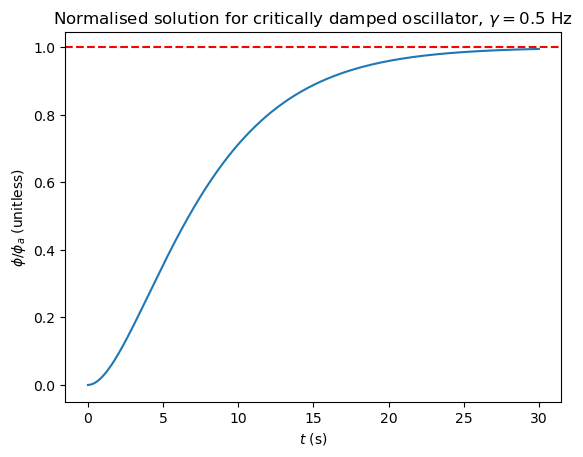

In [106]:
phi_a = 2
T = 10 # s
t = np.linspace(0, 3*T, 1000)
gamma = 0.5
phi = (1 - np.exp(-gamma/2 * t)*(1 + gamma/2 * t))
plt.plot(t, phi)
plt.axhline(1, c="r", linestyle="--")
#plt.axhline(0.99, c="b")
#plt.axvline(T)
plt.ylabel("$\phi / \phi_a$ (unitless)")
plt.xlabel("$t$ (s)")
plt.title(f"Normalised solution for critically damped oscillator, $\gamma = {gamma}$ Hz")
plt.savefig(f"figs/crit_damped_{gamma=}.png")
plt.show()

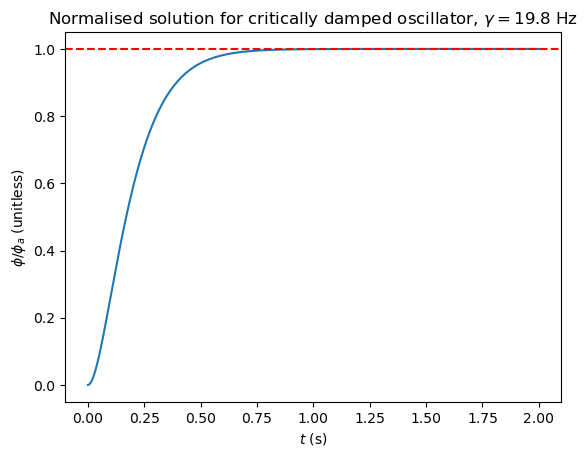

In [ ]:
phi_a = 2
T = 10 # s
t = np.linspace(0, 0.2*T, 1000)
gamma = 19.8
phi = (1 - np.exp(-gamma/2 * t)*(1 + gamma/2 * t))
plt.plot(t, phi)
plt.axhline(1, c="r", linestyle="--")
#plt.axhline(0.99, c="b")
#plt.axvline(T)
plt.ylabel("$\phi / \phi_a$ (unitless)")
plt.xlabel("$t$ (s)")
plt.title(f"Normalised solution for critically damped oscillator, $\gamma = {gamma}$ Hz")
plt.savefig(f"figs/crit_damped_{gamma=}.png")
plt.show()

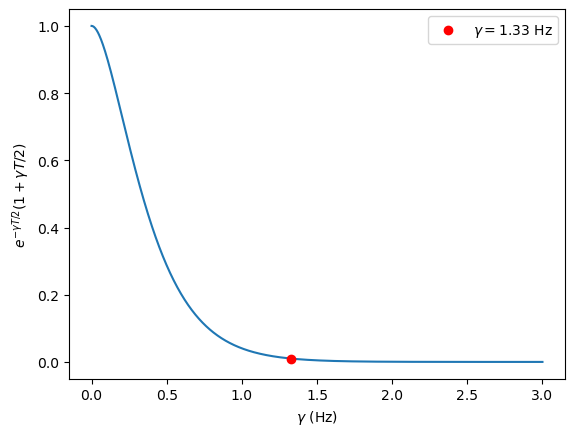

In [114]:
T = 10 # s
gamma_space = np.linspace(0, 3, 1000)

coeff = np.exp(-gamma_space/2 * T)*(1 + gamma_space/2 * T)

epsilon = 1000
target = 0.01
index = 0
for i in range(len(coeff)):
    if np.abs(coeff[i] - target) < epsilon:
        epsilon = np.abs(coeff[i] - target)
        index = i

plt.plot(gamma_space, coeff)
plt.scatter(*(gamma_space[index], coeff[index]), c="r", zorder=5, label=f"$\gamma = {gamma_space[index]:.3}$ Hz")
#plt.axhline(0.01)
#plt.axvline(1.3)
#plt.axvline(gamma_space[index], c="r")
plt.legend()
plt.ylabel("$e^{-\gamma T / 2}(1 + \gamma T / 2)$")
plt.xlabel("$\gamma$ (Hz)")
plt.savefig("figs/numerical_det.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


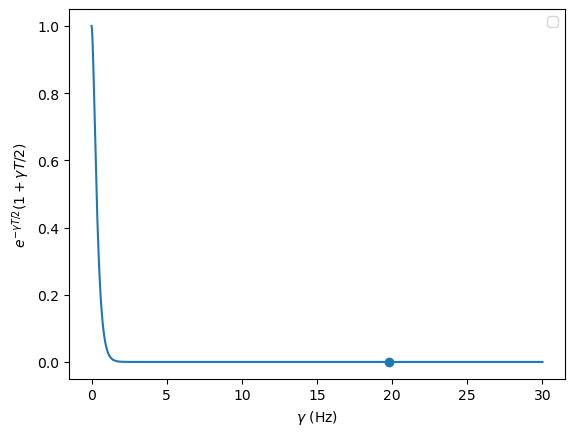

In [122]:
T = 10 # s
gamma_space = np.linspace(0, 30, 1000)
gamma_c = 19.8

coeff = np.exp(-gamma_space/2 * T)*(1 + gamma_space/2 * T)
coeff_c = np.exp(-gamma_c/2 * T)*(1 + gamma_c/2 * T)

epsilon = 1000
target = 0.01
index = 0
for i in range(len(coeff)):
    if np.abs(coeff[i] - target) < epsilon:
        epsilon = np.abs(coeff[i] - target)
        index = i

plt.plot(gamma_space, coeff)
plt.scatter(gamma_c, coeff_c)
#plt.scatter(*(gamma_space[index], coeff[index]), c="r", zorder=5, label=f"$\gamma = {gamma_space[index]:.3}$ Hz")
#plt.axhline(0.01)
#plt.axvline(1.3)
#plt.axvline(gamma_space[index], c="r")
plt.legend()
plt.ylabel("$e^{-\gamma T / 2}(1 + \gamma T / 2)$")
plt.xlabel("$\gamma$ (Hz)")
#plt.savefig("figs/numerical_det.png")
plt.show()

## 2.
i) Assuming $s(t) = s_0 \sin(\omega_0 t)$ when $t\in[0, T]$ and $s(t)=0$ otherwise. Then we can compute the Fourier transform $s(\omega)$
$$s(\omega) = \int ^{\infty}_{-\infty} s(t)e^{i\omega t}dt \\
= \frac{s_0}{2i} \int ^T _0 \left( e^{i(ω+ω_0)t} - e^{i(\omega-ω_0)t} \right)dt \\ 
= \frac{s_0}{\omega^2 - ω_0^2} \left[ -ω_0 + e^{iωT}\left( \omega_0\cos(\omega_0 T) - i\omega\sin(\omega_0 T) \right) \right]$$

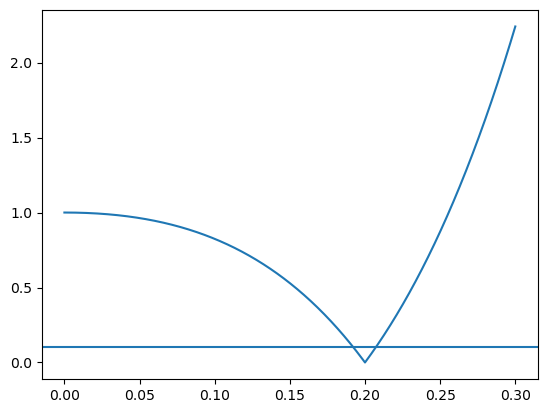

ii) Plotting the modulus $|s(\omega_0)|^2$ when $\omega_0 = 2\pi \cdot 440 \textrm{ Hz}$ we get:

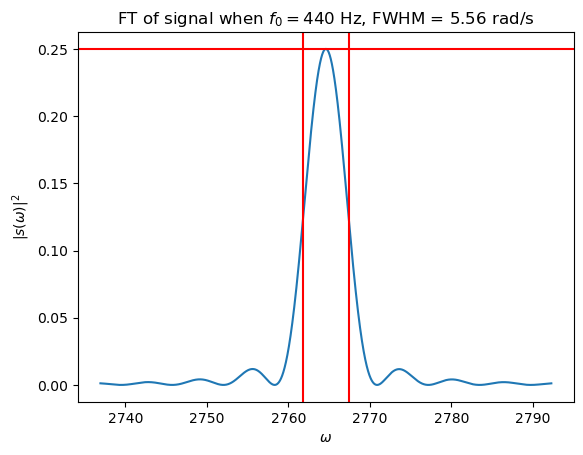

FWHM = 5.562934582198068 rad/s


In [18]:
def s_FT_analyt(w, w0, s0, T):
    return ((s0)/(w**2 - w0**2))* (-w0 + np.exp(1j*w*T)*(w0*np.cos(w0*T) - 1j*np.sin(w0*T)))

def find_FWHM(X, T): # assumes symmetric signal around peak
    max_index = 0
    for i in range(len(X)):
        if X[i] > X[max_index]:
            max_index = i
    
    max_val = X[max_index]
    target = max_val/2
    
    #print(f"found {max_val=}")

    FWHM_index = max_index
    epsilon = np.inf
    for i in range(len(X)):
        n_epsilon = np.abs(target - X[i])
        if n_epsilon < epsilon:
            epsilon = n_epsilon
            FWHM_index = i
        #print(n_epsilon)

    FWHM = 2*np.abs(T[FWHM_index]-T[max_index])
    return FWHM
    
    
T_array = []
f_disp_array_T = []


f_0 = 440
w0 = 2*np.pi*f_0 # rad/s
a = 0.1
w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
T = 1 # s
s0 = 1
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2



#plt.plot(w_domain, modulus1_sq)
#plt.xlabel("$\omega$")
#plt.title(f"FT of signal when $\omega_0 = {w0:.4}$ rad/s")
#plt.show()

a = 0.01
w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
T = 1 # s
s0 = 1
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $f_0 = {f_0}$ Hz, FWHM = {width1:.3} rad/s")
plt.ylabel("$|s(\omega)|^2$")
plt.savefig(f"figs/fouriert_{f_0=}.png")
plt.show()


print(f"FWHM = {width1} rad/s")

T_array.append(T)
f_disp_array_T.append(width1)


The FWHM in this case is ~ 5.6 rad/s. This can be interpreted as the spectral distribution of our signal $\Omega$. Considering the temporal dispersion - the time period that characterises our signal - $T = 1s$, this value satisfies the approximate inequality (which we will call the dispersion relation) :
$$\Omega \ge \frac{\pi}{2T}\textrm{ rad/s}$$

We repeat for other values of $\omega_0$ and $T$

For $f_0 = 55$ Hz, corresponding to the A1 string on a bass

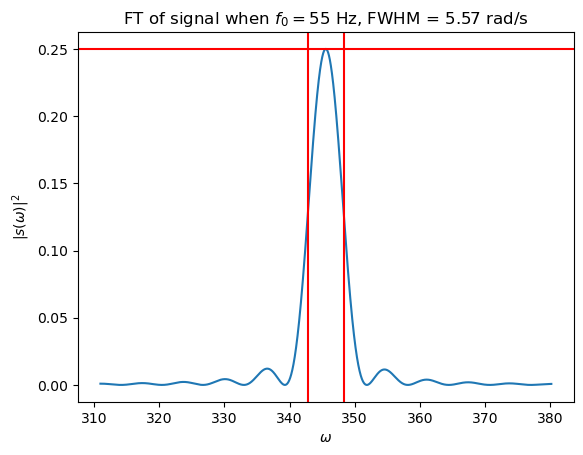

FWHM = 5.5712292162670565 rad/s


In [19]:
w0 = 2*np.pi*55 # rad/s
f_0 = 55
a = 0.1
w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
T = 1 # s
s0 = 1
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

#plt.plot(w_domain, modulus1_sq)
#plt.xlabel("$\omega$")
#plt.title(f"FT of signal when $\omega_0 = {w0:.4}$ rad/s")
#plt.show()


a = 0.01
#w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
T = 1 # s
s0 = 1
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $f_0 = {f_0}$ Hz, FWHM = {width1:.3} rad/s")
plt.ylabel("$|s(\omega)|^2$")
plt.savefig(f"figs/fouriert_{f_0=}.png")
plt.show()

print(f"FWHM = {width1} rad/s")

For $f_0 = 10$ Hz

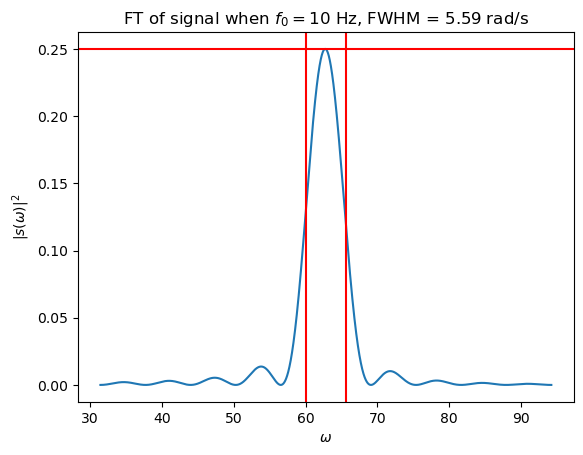

FWHM = 5.592594182808099 rad/s


In [20]:
w0 = 2*np.pi*10 # rad/s
f_0 = 10
a = 0.5
w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
T = 1 # s
s0 = 1
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

#plt.plot(w_domain, modulus1_sq)
#plt.xlabel("$\omega$")
#plt.title(f"FT of signal when $\omega_0 = {w0:.4}$ rad/s")
#plt.show()

a = 1
#w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
T = 1 # s
s0 = 1
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $f_0 = {f_0}$ Hz, FWHM = {width1:.3} rad/s")
plt.ylabel("$|s(\omega)|^2$")
plt.savefig(f"figs/fouriert_{f_0=}.png")
plt.show()

print(f"FWHM = {width1} rad/s")

Something funky seems to occur around $f_0 = 20$ kHz. Feels like some kind of resonance, but between what? Anyways, I unfortunately lack the time to characterise this strange behaviour fully, but this is interesting indeed.

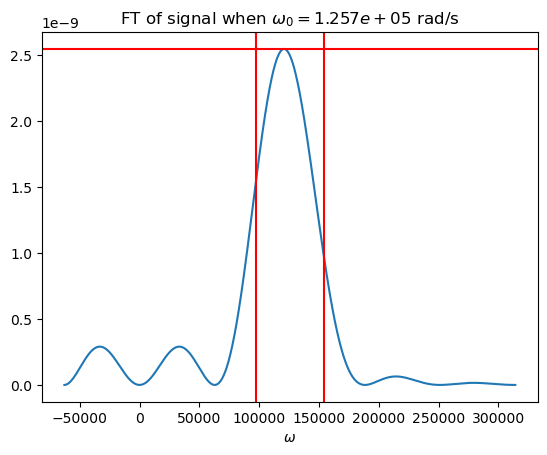

FWHM = 57157.56931103661 rad/s
VERY HIGH!


In [19]:
w0 = 2*np.pi*20000 # rad/s
a = 1.5
w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
T = 1 # s
s0 = 1
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

#plt.plot(w_domain, modulus1_sq)
#plt.xlabel("$\omega$")
#plt.title(f"FT of signal when $\omega_0 = {w0:.4}$ rad/s")
#plt.show()

a = 0.5
#w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $\omega_0 = {w0:.4}$ rad/s")
plt.show()

print(f"FWHM = {width1} rad/s")
print("VERY HIGH!")

The spectral dispersion does increase as we decrease frequency (57157 > 5.58 > 5.57 > 5.56). Over the range of frequencies [10 Hz, 440 Hz] however this increase is very small (at least for $T = 1$ s). Since this frequency range is most sensible for string instruments, for waveforms of temportal length $T = 1$ s, we can say that the spectral dispersion is nearly independent of beat frequency.

We test different values of $T$, always at $f_0 = 440$ Hz

$T = 0.1$ s, $f_0 = 440$ Hz

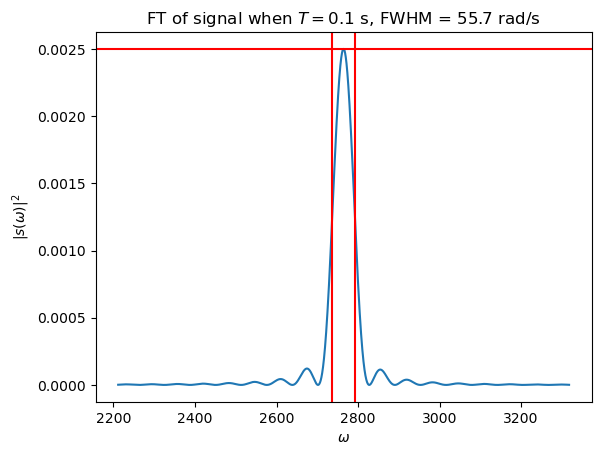

FWHM = 55.73994094289992 rad/s


In [21]:
T = 0.1 # s
w0 = 2*np.pi*440 # rad/s
a = 0.2
s0 = 1


w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $T = {T}$ s, FWHM = {width1:.3} rad/s")
plt.ylabel("$|s(\omega)|^2$")
plt.savefig(f"figs/fouriert_{T=}.png")
plt.show()

print(f"FWHM = {width1} rad/s")
T_array.append(T)
f_disp_array_T.append(width1)

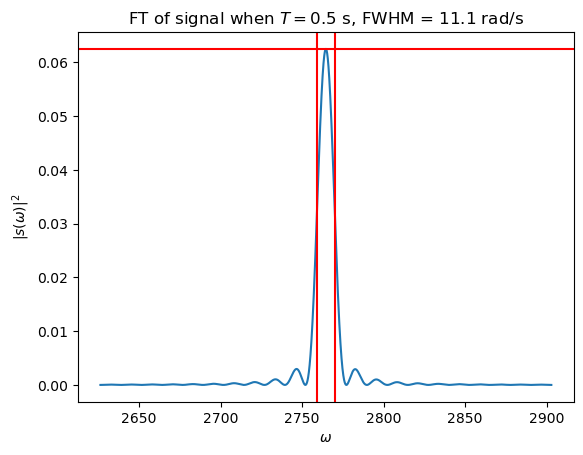

FWHM = 11.114809652304757 rad/s


In [22]:
T = 0.5 # s
w0 = 2*np.pi*440 # rad/s
a = 0.05
s0 = 1


w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $T = {T}$ s, FWHM = {width1:.3} rad/s")
plt.ylabel("$|s(\omega)|^2$")
plt.savefig(f"figs/fouriert_{T=}.png")
plt.show()

print(f"FWHM = {width1} rad/s")
T_array.append(T)
f_disp_array_T.append(width1)

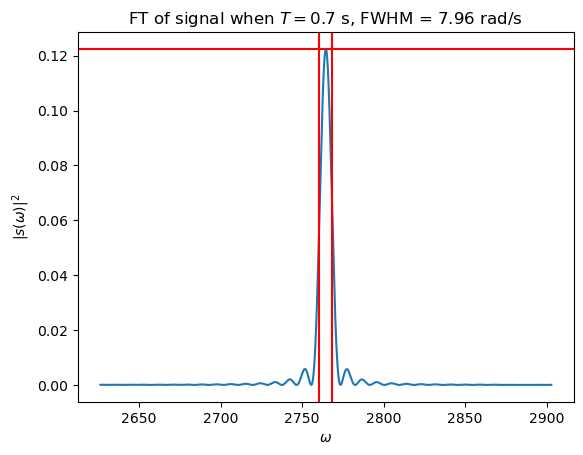

FWHM = 7.96284870612817 rad/s


In [23]:
T =  0.7# s
w0 = 2*np.pi*440 # rad/s
a = 0.05
s0 = 1


w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $T = {T}$ s, FWHM = {width1:.3} rad/s")
plt.ylabel("$|s(\omega)|^2$")
plt.savefig(f"figs/fouriert_{T=}.png")
plt.show()

print(f"FWHM = {width1} rad/s")
T_array.append(T)
f_disp_array_T.append(width1)

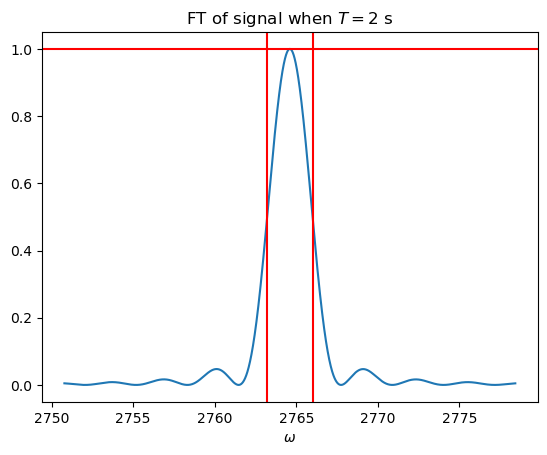

FWHM = 2.781467291099034 rad/s


In [23]:
T = 2 # s
w0 = 2*np.pi*440 # rad/s
a = 0.005
s0 = 1


w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $T = {T}$ s")
plt.show()

print(f"FWHM = {width1} rad/s")
T_array.append(T)
f_disp_array_T.append(width1)

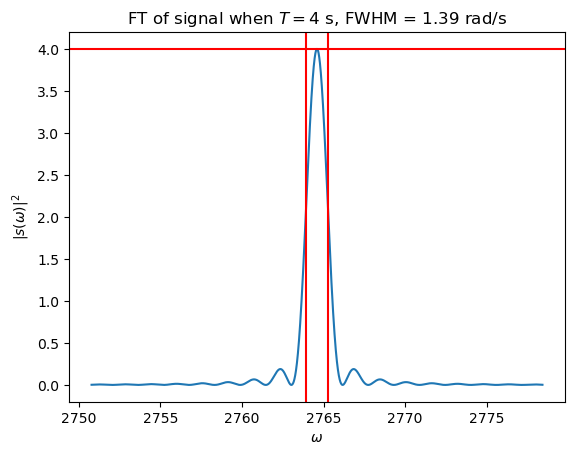

FWHM = 1.3934985235728163 rad/s


In [24]:
T = 4 # s
w0 = 2*np.pi*440 # rad/s
a = 0.005
s0 = 1


w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $T = {T}$ s, FWHM = {width1:.3} rad/s")
plt.ylabel("$|s(\omega)|^2$")
plt.savefig(f"figs/fouriert_{T=}.png")
plt.show()

print(f"FWHM = {width1} rad/s")
T_array.append(T)
f_disp_array_T.append(width1)

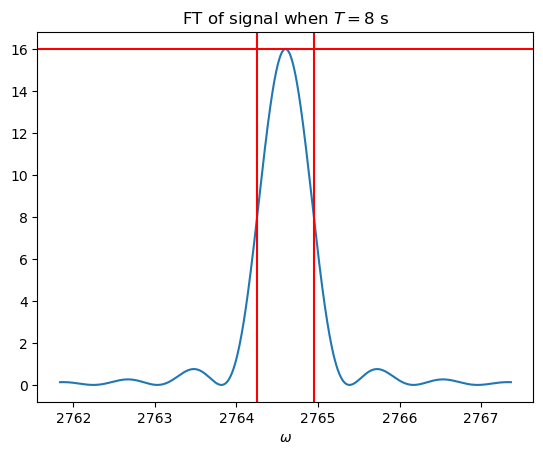

FWHM = 0.6956433105769975 rad/s


In [28]:
T = 8 # s
w0 = 2*np.pi*440 # rad/s
a = 0.001
s0 = 1


w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $T = {T}$ s")
plt.show()

print(f"FWHM = {width1} rad/s")
T_array.append(T)
f_disp_array_T.append(width1)

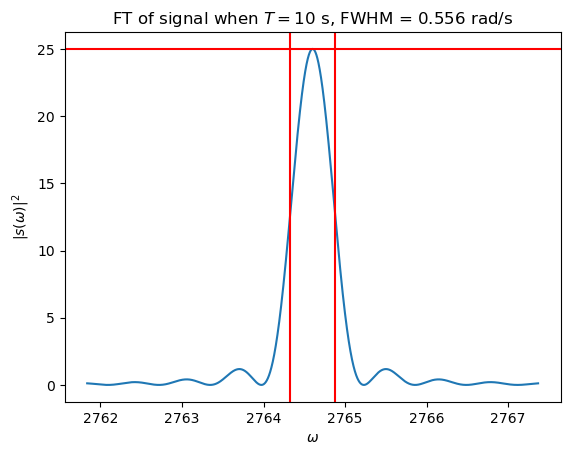

FWHM = 0.556293458219443 rad/s


In [25]:
T = 10 # s
w0 = 2*np.pi*440 # rad/s
a = 0.001
s0 = 1


w_domain = np.linspace(-a*w0 + w0, +a*w0 + w0, 10000) # we centre around w0
s_FT = s_FT_analyt(w_domain, w0, s0, T)
modulus1_sq = np.abs(s_FT)**2

plt.plot(w_domain, modulus1_sq)
max_val = max(modulus1_sq)
plt.axhline(max_val, c="r") # Half maximum occurs at roughly 0.25
#width1 = 7.7 # FWHM for w0 = 2pi * 440 Hz
width1 = find_FWHM(modulus1_sq, w_domain)
plt.axvline(w0 + width1/2, c="r")
plt.axvline(w0 - width1/2, c="r")
plt.xlabel("$\omega$")
plt.title(f"FT of signal when $T = {T}$ s, FWHM = {width1:.3} rad/s")
plt.ylabel("$|s(\omega)|^2$")
plt.savefig(f"figs/fouriert_{T=}.png")
plt.show()

print(f"FWHM = {width1} rad/s")
T_array.append(T)
f_disp_array_T.append(width1)

[0.1 s, 10 s] seems like a reasonable range for how how long a violin or bass note would normally be played (source, I used to play violin in an orchestra). We can plot the frequency dispersion vs period $T$:

From the data, the relation looks roughly like a hyperbola. In fact, a hyperbola is exactly what we expect as given by the dispersion relationship.

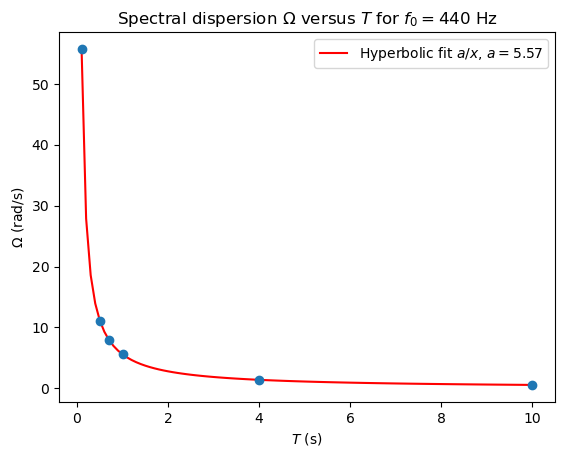

In [30]:
def hyperbola(x, a):
    return a/x

popt, pcov = curve_fit(hyperbola, T_array, f_disp_array_T)
a = popt[0]

T_domain = np.linspace(0.1, 10, 100)
plt.plot(T_domain, hyperbola(T_domain, a), c="r", zorder=-1, label=f"Hyperbolic fit $a/x$, $a={a:.3}$")
plt.scatter(T_array, f_disp_array_T)
plt.ylabel("$\Omega$ (rad/s)")
plt.xlabel("$T$ (s)")
plt.legend()
plt.title("Spectral dispersion $\Omega$ versus $T$ for $f_0 = 440$ Hz")
plt.savefig("figs/Omega_vs_T.png")
plt.show()

iii)
We remind ourselves of the dispersion relationship:
$$\Omega \cdot T \ge \frac{\pi}{2}\textrm{ rad}$$

Where $\Omega$ is the spectral dispersion of the signal, and $T$ the time period of the signal. I am not using the exact uncertainty relation as $T$ and $\Omega$ aren't exactly standard deviations. Since this approximate dispersion relation gives a larger lower limit, it is a safer assumption.

In order to resolve a note of frequency $f_0$, then its spectral dispersion $\Omega$ needs to be smaller than the closest semi-tone. Since neighbouring semi-tones are multiplied by a $\sqrt[12]{2}$ factor, we can find the lower limit for $T$, under the condition that $\Omega \le (\sqrt[12]{2} - 1)\omega_0$.

$$T_{min} = \frac{\pi}{2\omega_0(\sqrt[12]{2} - 1)}$$
Once again a hyperbola!

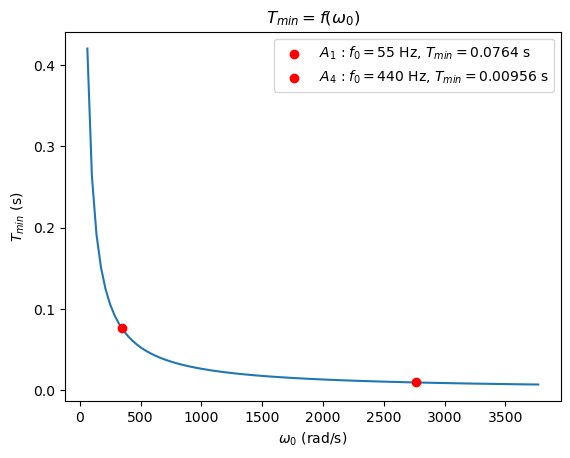

In [138]:
def T_min(w0):
    return (np.pi)/(2*w0*( 2**(1/12) -1 ))
w0_domain = np.linspace(10, 600, 100)*2*np.pi
#T_min = (np.pi)/(2*w0_domain*( 2**(1/12) -1 ))

plt.plot(w0_domain, T_min(w0_domain))
plt.scatter(55*2*np.pi, T_min(55*2*np.pi), label="$A_1 \, : f_0 = 55$"+" Hz, $T_{min} = $"+f"{T_min(55*2*np.pi):.3} s", c="red", zorder=3)
plt.scatter(440*2*np.pi, T_min(440*2*np.pi), label="$A_4 \, : f_0 = 440$"+" Hz, $T_{min} = $"+f"{T_min(440*2*np.pi):.3} s", c="red", zorder=3)
plt.title("$T_{min} = f(\omega_0)$")
plt.xlabel("$\omega_0$ (rad/s)")
plt.ylabel("$T_{min}$ (s)")
plt.legend()

plt.savefig("figs/Tmin_vs_omega.png")
plt.show()

#print(np.pi/(2*(2**(1/12) - 1)))

Since the bass plays at at a lower frequency than a violin, the minimum period that must be played by a bass is longer than that of the violin - which explains why the violin typically plays at a much faster tempo. In fact, if we compare the notes A1 (played on bass) to A4 (played on violin), the bass's minimum period is over 7 times higher.

## 3)

i) To get an idea of what it looks like, we plot an example of $p(t)$ where $\tau = 1$ and $T = 4\pi \tau$:

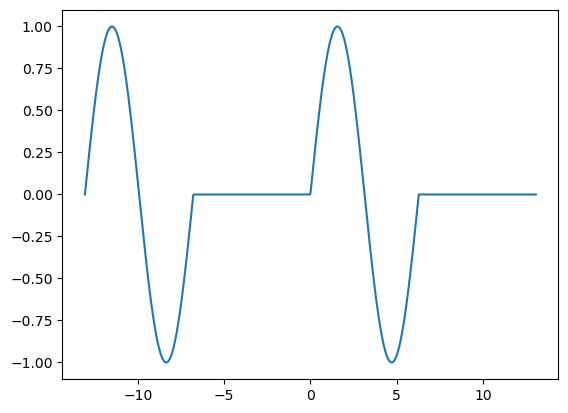

In [127]:
def p(t, T, tau):
    t_p = t % T # only keep the remainder w.r.t T, the result is positive
    res = np.zeros(len(t))
    for i in range(len(t)):
        if t_p[i] <= 2*np.pi*tau:
            res[i] = np.sin(t_p[i]/tau)
        else:
            res[i] = 0
    return res
    
tau = 1
T = 2*(2*np.pi*tau) + 0.5
t_domain = np.linspace(-T, T, 1000)
plt.plot(t_domain, p(t_domain, T, tau))
plt.show()




We define the Fourier expansion of $p(t)$ as:
$$p(t) = \sum_{j=1}^{\infty} a_j \cos(j\omega t) + b_j \sin(j\omega t) \qquad \textrm{where } \omega = \frac{2\pi}{T}$$

Clearly $p(t)$ is neither an odd or even function, therefore neither of the coefficients $a_j$ or $b_j$ will vanish in general. Since $p(t)$ is basically a cut-off sine function of angular frequency $\omega_0 = \frac{1}{\tau}$, we should expect that the most important coefficient would be $b_j$ for $j$ such that $\frac{2\pi}{T}j \approx \frac{1}{\tau}$.

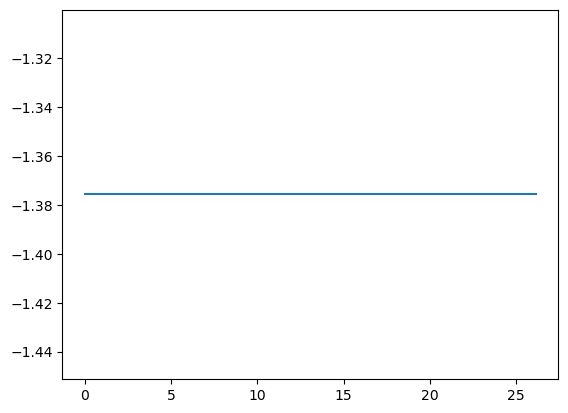

[-0.02391216 -0.25096969  0.0169329   0.00678869  0.00383499  0.00250366
  0.00177531  0.00132916  0.00103452  0.00082911]
[ 1.52615322e+02 -1.08146467e-03 -1.34586899e-02  7.47718721e-05
  6.10001765e-03  1.09306409e-03  7.95069795e-03  2.07749817e-03
  7.04966599e-03  2.98786625e-03]


In [143]:
def aj(j, w, w0):
    eps = 0.001
    #num = w0*np.cos(j*2*np.pi*w/w0) - w0
    #denom = max((j*w)**2- w0**2, eps)
    #return 2*np.pi/w * num/denom

    part1 = (1 - np.cos(j*2*np.pi*w/w0))/(w0 + j*w)
    part2 = (1 - np.cos(j*2*np.pi*w/w0))/(w0 - j*w0 + eps)

    return w/(2*np.pi) * (part1 + part2)


def bj(j, w, w0):
    eps = 0.001
    #num = w0*np.cos(j*2*np.pi*w/w0)
    #denom = max((j*w)**2- w0**2, eps)
    #return 2*np.pi/w * num/denom

    part1 = (np.sin(2*np.pi*w/w0))/(j*w - w0 + eps)
    part2 = (np.sin(2*np.pi*w/w0))/(j*w + w0)
    return w/(2*np.pi) * (part1 - part2)

def fourier_coeffs(n, T, tau): # n >= 1
    w = 2*np.pi / T
    w0 = 1/tau
    a, b = np.zeros(n), np.zeros(n)
    for i in range(n): # i starts at 0 and ends at n-1, j starts at 1 and ends at n
        a[i] = aj(i+1, w, w0)
        b[i] = bj(i+1, w, w0)

    return a, b

def ai_2(i, T, tau):
    eps = 0.001
    part1 = np.exp(-1j*(2*np.pi**2 *i * tau/T))/(1/tau - 2*np.pi*i/T + eps)
    part2 = part1 = np.exp(+1j*(2*np.pi**2 *i * tau/T))/(1/tau + 2*np.pi*i/T + eps)
    part3 = -1/(1/tau - 2*np.pi*i/T + eps) - 1/(1/tau + 2*np.pi*i/T + eps)

    return -1/(2*T) * (part1 + part2 + part3)

n = 10
#a, b = fourier_coeffs(n, T, tau)
#w = 2*np.pi / T
#expansion = np.zeros(len(t_domain))
#for j in range(n):
#    expansion += a[j]*np.cos((j+1)*w*t_domain) + b[j]*np.sin((j+1)*w*t_domain)

expansion = np.zeros(len(t_domain), dtype=complex)
for i in range(-n, n+1, 1):
    expansion += ai_2(i, T, tau)*np.exp(-1j*1*2*np.pi/T)


t_domain = np.linspace(0, 2*T, 1000)
#plt.plot(np.arange(start=1, stop=n+1), b)
#plt.plot(np.arange(start=1, stop=n+1), a)
#plt.plot(t_domain, p(t_domain, T, tau))
plt.plot(t_domain, expansion.imag)
plt.show()

print(b)
print(a)



